# pandas e csv

## Resumo

Quase sempre quando formos "ler" um arquivo csv, vamos usar o pandas. É prático e bem eficiente.

## Funcionamento

In [1]:
import pandas as pd

- Vamos ler um arquivo real, com a Base de Dados de Vendas da Empresa "Contoso"

In [2]:
path = r'C:\Users\Caroline\OneDrive\Documentos\Meus estudos\PYTHON\HASHTAG\data'

In [3]:
vendas_df = pd.read_csv(path+'\Contoso - Vendas - 2017.csv', sep=';')

vendas_df

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


# Comparando, Tratando e Mesclando DataFrames

## Objetivo

Vamos modificar os IDs para os nomes dos produtos, dos clientes e das lojas, para nossas análises ficarem mais intuitivas futuramente. Para isso, vamos criar um data frame com todos os detalhes.

- Usaremos o método merge para isso e, depois se quisermos, podemos pegar apenas as colunas que queremos do dataframe final.

### Criando nossos dataframes

In [4]:
import pandas as pd

#às vezes precisaremos mudar o encoding. Possiveis valores para testar:
#encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'
produtos_df = pd.read_csv(path+'\Contoso - Cadastro Produtos.csv', sep=';')
lojas_df = pd.read_csv(path+'\Contoso - Lojas.csv', sep=';')
clientes_df = pd.read_csv(path+'\Contoso - Clientes.csv', sep=';')

In [5]:
#usaremos o display para ver todos os dataframes
#display(vendas_df)
display(produtos_df)
display(lojas_df)
display(clientes_df)

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


,ID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


,ID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995,NaN,NaN,NaN,NaN
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943,NaN,NaN,NaN,NaN
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989,NaN,NaN,NaN,NaN
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998,NaN,NaN,NaN,NaN
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980,NaN,NaN,NaN,NaN
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001,NaN,NaN,NaN,NaN
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997,NaN,NaN,NaN,NaN
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001,NaN,NaN,NaN,NaN


### Vamos tirar as colunas inúteis do clientes_df ou pegar apenas as colunas que quisermos

In [6]:
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df_ajus = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]
display(produtos_df)

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


### Agora vamos juntar os dataframes para ter 1 único dataframe com tudo "bonito"

In [7]:
#juntando os dataframes

# default do merge é inner

vendas_df = vendas_df.merge(produtos_df_ajus, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')

In [8]:
#exibindo o dataframe final
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


In [9]:
#vamos renomear o e-mail para ficar claro que é do cliente
vendas_df = vendas_df.rename(columns={'E-mail': 'E-mail do Cliente'})
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


# Resumos e um pouco de Visualização no pandas


## Resumo

Vamos ver alguns métodos para analisar nossas tabelas (dataframes)

Além disso, vamos usar os plot de gráfico padrões do pandas, mas no projeto de DataScience veremos outras mais bonitas e também muito práticas.

OBS: O pandas usa o matplotlib (que vimos na seção de "módulos e bibliotecas") para plotar gráficos.<br>
Se quiser personalizar mais do que o padrão do pandas, importe o matplotlib e use os métodos do matplotlib

### Qual cliente que comprou mais vezes?

- Usaremos o método .value_counts() para contar quantas vezes cada valor do Dataframe aparece
- Usaremos o método .plot() para exibir um gráfico

In [10]:
clientes_mais = vendas_df['E-mail do Cliente'].value_counts()

<AxesSubplot:>

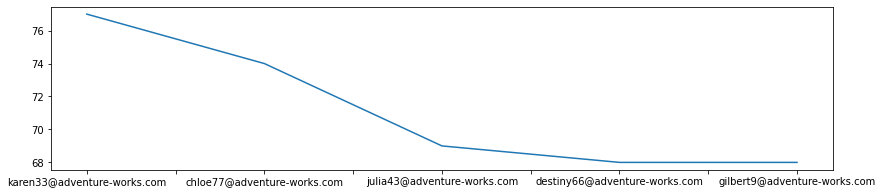

In [11]:
clientes_mais[:5].plot(figsize = (14,3))

### Qual a Loja que mais vendeu?

- Usaremos o .groupby para agrupar o nosso dataframe, de acordo com o que queremos (somando as quantidades de vendas, por exemplo)

In [12]:
loja_mais = vendas_df[['Nome da Loja', 'Quantidade Vendida']].groupby(['Nome da Loja']).sum()

In [13]:
loja_mais

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


- Agora precisamos pegar o maior valor. Temos 2 formas:
    1. Ordenar o dataframe em ordem decrescente de Quantidade Vendida
        - Método .sort_values
    2. Pegar o Maior valor diretamente
        - Métodos .max() e .idxmax()

In [14]:
loja_mais.sort_values(by = 'Quantidade Vendida', ascending= False)[:1]

,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117


In [15]:
loja_mais.max()

Quantidade Vendida    1029117
dtype: int64

In [16]:
loja_mais.idxmax()

Quantidade Vendida    Loja Contoso Catalog 
dtype: object

### Qual produto que menos vendeu?

- Já temos uma lista criada para isso, basta verificarmos o final da lista (já que ela está ordenada) ou então usarmos os métodos:
    1. min()
    2. idxmin()

In [17]:
print(loja_mais.min(), loja_mais.idxmin(), sep = "\n")

Quantidade Vendida    234
dtype: int64
Quantidade Vendida    Loja Contoso Venezia 
dtype: object


### Primeiro, vamos aplicar uma função normalmente. Qual o % das vendas que foi devolvido?

- Para isso vamos somar as quantidades nas colunas correspondentes. Lembrando, o % vai ser: Total Devolvido / Total Vendido.

In [18]:
vendas_df.columns

Index(['Numero da Venda', 'Data da Venda', 'Data do Envio', 'ID Canal',
       'ID Loja', 'ID Produto', 'ID Promocao', 'ID Cliente',
       'Quantidade Vendida', 'Quantidade Devolvida', 'Nome do Produto',
       'Nome da Loja', 'E-mail do Cliente'],
      dtype='object')

In [19]:
perc_devol = sum(vendas_df['Quantidade Devolvida'])/sum(vendas_df['Quantidade Vendida'])
print('Total devolvido {:.2%}'.format(perc_devol))

Total devolvido 1.17%


### Agora, se quisermos fazer a mesma análise apenas para 1 loja. Queremos filtrar apenas os itens da Loja Contoso Europe Online e saber o % de devolução dessa loja.

- Para isso, vamos precisar filtrar. A forma de filtrar nos dataframes é uma "simples" comparação

In [20]:
perc_devol_espic = sum(vendas_df[vendas_df['Nome da Loja'] == 'Loja Contoso Europe Online ']['Quantidade Devolvida'])/sum(vendas_df[vendas_df['Nome da Loja'] == 'Loja Contoso Europe Online ']['Quantidade Vendida'])
print('Total devolvido {:.1%}'.format(perc_devol_espic))

Total devolvido 1.3%


### Desafio: e se eu quisesse criar uma tabela apenas com as vendas da Loja Contoso Europe Online e que não tiveram nenhuma devolução. Quero criar essa tabela e saber quantas vendas são.

- Repare que nesse caso são 2 condições, como fazemos isso?

In [21]:
vendas_df[(vendas_df['Nome da Loja'] == 'Loja Contoso Europe Online ') & (vendas_df['Quantidade Devolvida'] == 0)].head()

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
18,786402,21/10/2017,25/10/2017,4,306,226,10,21344,8,0,Litware Home Theater System 2.1 Channel E210 B...,Loja Contoso Europe Online,makayla3@adventure-works.com
19,383897,25/05/2017,28/05/2017,3,306,347,1,21344,20,0,Fabrikam Laptop14.1 M4100 White,Loja Contoso Europe Online,makayla3@adventure-works.com
77,559478,26/07/2017,29/07/2017,3,306,1382,1,24440,5,0,Contoso Single-line phones E10 Grey,Loja Contoso Europe Online,noah55@adventure-works.com


# Adicionando Colunas, Modificando Colunas e Valores

### Agora, e se quisermos acrescentar uma coluna com o mês, o dia e o ano de cada venda (e não só a data completa)

In [22]:
vendas_df['Data da Venda']

0         01/01/2017
1         23/11/2017
2         20/03/2017
3         08/01/2017
4         23/04/2017
             ...    
980637    23/11/2017
980638    09/12/2017
980639    21/06/2017
980640    13/11/2017
980641    02/12/2017
Name: Data da Venda, Length: 980642, dtype: object

#### pd.to_datetime()

In [23]:
vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'], format= '%d/%m/%Y')

#### extracting dates from datetime

In [24]:
vendas_df['ano_venda'] = vendas_df['Data da Venda'].dt.year
vendas_df['mes_venda' ] = vendas_df['Data da Venda'].dt.month
vendas_df['dia_venda'] = vendas_df['Data da Venda'].dt.day

In [25]:
vendas_df.head()

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente,ano_venda,mes_venda,dia_venda
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp,2017,1,1
1,880458,2017-11-23,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp,2017,11,23
2,191019,2017-03-20,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp,2017,3,20
3,18610,2017-01-08,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp,2017,1,8
4,287704,2017-04-23,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp,2017,4,23


### E agora, caso a gente queira modificar 1 valor específico, como fazemos? Vamos importar novamente a base de produtos

In [26]:
novo_produtos_df = pd.read_csv(path+'\Contoso - Cadastro Produtos.csv', sep=';')

In [27]:
novo_produtos_df = novo_produtos_df.set_index('Nome do Produto')
display(novo_produtos_df.head())

,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
Nome do Produto,,,,,,,,
Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22


### Antes de entrar no próximo exemplo, precisamos falar de 2 métodos:
    1. loc - permite pegar uma linha de acordo com o índice dela. Ele dá erro caso não encontre o índice. Isso é interessante principalmente quando o índice é uma informação relevante ao invés só do número do índice ou quando queremos pegar alguma linha específica do dataframe (ao invés de ir do início do dataframe até a linha 5, por exemplo).
        Também podemos usar como loc[índice_linha, índice_coluna] para acessar um valor específico e modificá-lo.
    2. iloc - enxerga o dataframe como linhas e colunas e consegue pegar o valor com um número de linha e um número de coluna. Repara que ele não analisa o valor do índice da linha e da coluna, apenas a posição importa.
        Uso: iloc[num_linha, num_coluna]
        
- Vendo na prática

In [28]:
#vamos pegar o preço produto Contoso Optical Wheel OEM PS/2 Mouse E60 Black
#por loc
novo_produtos_df.loc['Contoso Optical Wheel OEM PS/2 Mouse E60 Black', 'Preco Unitario']

# o index é nome do produto

'13'

In [29]:
#por iloc
novo_produtos_df.iloc[2, 5]

# use numeros

'13'

### A empresa decidiu aumentar o preço do produto ID 873 (Contoso Wireless Laser Mouse E50 Grey) para 23 reais. Como fazemos, para modificar isso na nossa base?

In [30]:
novo_produtos_df.loc['Contoso Wireless Laser Mouse E50 Grey','Preco Unitario']

'20,96'

In [31]:
novo_produtos_df.loc['Contoso Wireless Laser Mouse E50 Grey','Preco Unitario'] = '23,00'

In [32]:
novo_produtos_df.loc['Contoso Wireless Laser Mouse E50 Grey','Preco Unitario']

'23,00'

In [33]:
# se tivesse que usar o .iloc

#descobrimos qual eh o index da linha
produtos_df[produtos_df['Nome do Produto'] == 'Contoso Optical Wheel OEM PS/2 Mouse E60 Black'].index

Int64Index([2], dtype='int64')

In [34]:
# sabendo qual eh o index da coluna produto
# se quisermos modificar o produto 'Contoso Optical Wheel OEM PS/2 Mouse E60 Black' para 69

# original
produtos_df.iloc[2]

Nome do Produto         Contoso Optical Wheel OEM PS/2 Mouse E60 Black
Descricao do Produto                    PS/2 mouse, 6 feet mouse cable
Fabricante                                                Contoso, Ltd
Nome da Marca                                                  Contoso
Tipo                                                         Econômico
Custo Unitario                                                    6,63
Preco Unitario                                                      13
ID Produto                                                         880
ID Subcategoria                                                     22
Name: 2, dtype: object

In [35]:
produtos_df.head()

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22


In [36]:
produtos_df.iloc[2, 5] 

'6,63'

In [37]:
# atualizado
produtos_df.iloc[2, 5] = 69

In [38]:
produtos_df.iloc[2]

Nome do Produto         Contoso Optical Wheel OEM PS/2 Mouse E60 Black
Descricao do Produto                    PS/2 mouse, 6 feet mouse cable
Fabricante                                                Contoso, Ltd
Nome da Marca                                                  Contoso
Tipo                                                         Econômico
Custo Unitario                                                      69
Preco Unitario                                                      13
ID Produto                                                         880
ID Subcategoria                                                     22
Name: 2, dtype: object

# Exportando do DataFrame para um csv

### Depois de modificar um DataFrame, ou até criar um, muitas vezes podemos exportar esse dataframe para um csv

No pandas, isso é bem simples:

dataframe.to_csv('nome_do_arquivo.csv', sep=',')

### Criando um dicionário, transformando o dicionário em um DataFrame e Exportando para csv

In [39]:
vendas_produtos = {'iphone': [558147, 951642], 'galaxy': [712350, 244295], 'ipad': [573823, 26964], 'tv': [405252, 787604], 'máquina de café': [718654, 867660], 'kindle': [531580, 78830], 'geladeira': [973139, 710331], 'adega': [892292, 646016], 'notebook dell': [422760, 694913], 'notebook hp': [154753, 539704], 'notebook asus': [887061, 324831], 'microsoft surface': [438508, 667179], 'webcam': [237467, 295633], 'caixa de som': [489705, 725316], 'microfone': [328311, 644622], 'câmera canon': [591120, 994303]}

In [40]:
vendas_produtos_df = pd.DataFrame.from_dict(vendas_produtos, orient='index')
display(vendas_produtos_df)

,0,1
iphone,558147,951642
galaxy,712350,244295
ipad,573823,26964
tv,405252,787604
máquina de café,718654,867660
kindle,531580,78830
geladeira,973139,710331
adega,892292,646016
notebook dell,422760,694913
notebook hp,154753,539704


In [41]:
vendas_produtos_df = vendas_produtos_df.rename(columns={0: 'Vendas 2019', 1: 'Vendas 2020'})
display(vendas_produtos_df)

,Vendas 2019,Vendas 2020
iphone,558147,951642
galaxy,712350,244295
ipad,573823,26964
tv,405252,787604
máquina de café,718654,867660
kindle,531580,78830
geladeira,973139,710331
adega,892292,646016
notebook dell,422760,694913
notebook hp,154753,539704


In [ ]:
vendas_produtos_df.to_csv(r'Novo Vendas Produtos.csv', sep=',', encoding='latin1')